# Assignment 6: Knock airport Weather
Create a notebook called assignment_6_Weather.ipynb

Get the data from this link.

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

Plot:

The temperature
The mean temperature each day
The mean temperature for each month
60% of the marks will be given for the above

For the last 40%

Plot:

The Windspeed (there is data missing from this column)
The rolling windspeed (say over 24 hours)
The max windspeed for each day
The monthly mean of the daily max windspeeds (yer I am being nasty here)
You do not need to over comment your code. Marks will be given for how nice the plots are.

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
sns.set_theme(style="darkgrid")

In [3]:
url = 'https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv'

df = pd.read_csv(url, skiprows=23)
df.head()

C:\Users\luxxx\AppData\Local\Temp\ipykernel_23700\4234222533.py:3: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, skiprows=23)


date  ind rain  ind.1  temp  ind.2  wetb  dewpt  vappr  rhum  \
0  10-apr-1996 14:00    0  0.0      0  11.5      0   8.1    3.9    0.0     0   
1  31-jul-1996 08:00    0  0.0      0  11.5      0  11.1   10.7    0.0     0   
2  31-jul-1996 09:00    0  0.0      0  11.6      0  10.7    9.8    0.0     0   
3  31-jul-1996 10:00    0  0.0      0  12.9      0  11.3    9.8    0.0     0   
4  31-jul-1996 11:00    0  0.0      0  14.5      0  10.8    7.0    0.0     0   

   ... ind.3  wdsp ind.4  wddir  ww   w  sun    vis clht clamt  
0  ...     0     0     0      0  25  81  0.0  35000   32     5  
1  ...     0     0     0      0  25  82  0.0  40000   45     5  
2  ...     0     0     0      0  80  81  0.0   8000   32     7  
3  ...     0     0     0      0  25  82  0.0  28000   35     6  
4  ...     0     0     0      0   2  11  0.0  40000   40     6  

[5 rows x 21 columns]

In [4]:
df.shape

(256434, 21)

In [5]:
df['date'][:5]

0    10-apr-1996 14:00
1    31-jul-1996 08:00
2    31-jul-1996 09:00
3    31-jul-1996 10:00
4    31-jul-1996 11:00
Name: date, dtype: object

In [6]:
df['date'] = pd.to_datetime(df['date'])

C:\Users\luxxx\AppData\Local\Temp\ipykernel_23700\3532345252.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [7]:
df['date'].head()

0   1996-04-10 14:00:00
1   1996-07-31 08:00:00
2   1996-07-31 09:00:00
3   1996-07-31 10:00:00
4   1996-07-31 11:00:00
Name: date, dtype: datetime64[ns]

In [8]:
df.set_index(df['date'], inplace=True)

In [9]:
df.head()

date  ind rain  ind.1  temp  ind.2  wetb  \
date                                                                          
1996-04-10 14:00:00 1996-04-10 14:00:00    0  0.0      0  11.5      0   8.1   
1996-07-31 08:00:00 1996-07-31 08:00:00    0  0.0      0  11.5      0  11.1   
1996-07-31 09:00:00 1996-07-31 09:00:00    0  0.0      0  11.6      0  10.7   
1996-07-31 10:00:00 1996-07-31 10:00:00    0  0.0      0  12.9      0  11.3   
1996-07-31 11:00:00 1996-07-31 11:00:00    0  0.0      0  14.5      0  10.8   

                     dewpt  vappr  rhum  ... ind.3  wdsp ind.4  wddir  ww   w  \
date                                     ...                                    
1996-04-10 14:00:00    3.9    0.0     0  ...     0     0     0      0  25  81   
1996-07-31 08:00:00   10.7    0.0     0  ...     0     0     0      0  25  82   
1996-07-31 09:00:00    9.8    0.0     0  ...     0     0     0      0  80  81   
1996-07-31 10:00:00    9.8    0.0     0  ...     0     0     0      0  25  82   
1996-07-31 11:00:00    7.0    0.0     0  ...     0     0     0      0   2  11   

                     sun    vis clht clamt  
date                                        
1996-04-10 14:00:00  0.0  35000   32     5  
1996-07-31 08:00:00  0.0  40000   45     5  
1996-07-31 09:00:00  0.0   8000   32     7  
1996-07-31 10:00:00  0.0  28000   35     6  
1996-07-31 11:00:00  0.0  40000   40     6  

[5 rows x 21 columns]

In [10]:
df.drop(['date'], axis=1, inplace=True)

In [11]:
df.head()

ind rain  ind.1  temp  ind.2  wetb  dewpt  vappr  rhum  \
date                                                                          
1996-04-10 14:00:00    0  0.0      0  11.5      0   8.1    3.9    0.0     0   
1996-07-31 08:00:00    0  0.0      0  11.5      0  11.1   10.7    0.0     0   
1996-07-31 09:00:00    0  0.0      0  11.6      0  10.7    9.8    0.0     0   
1996-07-31 10:00:00    0  0.0      0  12.9      0  11.3    9.8    0.0     0   
1996-07-31 11:00:00    0  0.0      0  14.5      0  10.8    7.0    0.0     0   

                        msl  ind.3 wdsp  ind.4 wddir  ww   w  sun    vis clht  \
date                                                                            
1996-04-10 14:00:00  1016.7      0    0      0     0  25  81  0.0  35000   32   
1996-07-31 08:00:00  1011.4      0    0      0     0  25  82  0.0  40000   45   
1996-07-31 09:00:00  1011.4      0    0      0     0  80  81  0.0   8000   32   
1996-07-31 10:00:00  1011.2      0    0      0     0  25  82  0.0  28000   35   
1996-07-31 11:00:00  1011.0      0    0      0     0   2  11  0.0  40000   40   

                    clamt  
date                       
1996-04-10 14:00:00     5  
1996-07-31 08:00:00     5  
1996-07-31 09:00:00     7  
1996-07-31 10:00:00     6  
1996-07-31 11:00:00     6

Station Name: KNOCK AIRPORT
Station Height: 201 M 
Latitude:53.906  ,Longitude: -8.817

* date:  -  Date and Time (utc)
* rain:  -  Precipitation Amount (mm)
* temp:  -  Air Temperature (C)	
* wetb:  -  Wet Bulb Temperature (C)
* dewpt: -  Dew Point Temperature (C)             
* rhum:  -  Relative Humidity (%)
* vappr: -  Vapour Pressure (hPa)	 
* msl:   -  Mean Sea Level Pressure (hPa)
* wdsp:  -  Mean Wind Speed (knot)
* wddir: -  Predominant Wind Direction (degree)
* ww:    -  Synop code for Present Weather
* w:     -  Synop code for Past Weather
* sun:   -  Sunshine duration (hours)
* vis:   -  Visibility (m)
* clht:  -  Cloud height (100's of ft) - 999 if none
* clamt: -  Cloud amount
* ind:   -  Indicator

## Plotting the temperature

In [12]:
temps = pd.DataFrame(df['temp'])
temps.head()

temp
date                     
1996-04-10 14:00:00  11.5
1996-07-31 08:00:00  11.5
1996-07-31 09:00:00  11.6
1996-07-31 10:00:00  12.9
1996-07-31 11:00:00  14.5

In [13]:
days = df.index.day
months = df.index.month
years = df.index.year

In [14]:
month_names = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

Text(0.5, 1.0, 'Dublin Airport Temperatures (1996-2025)')

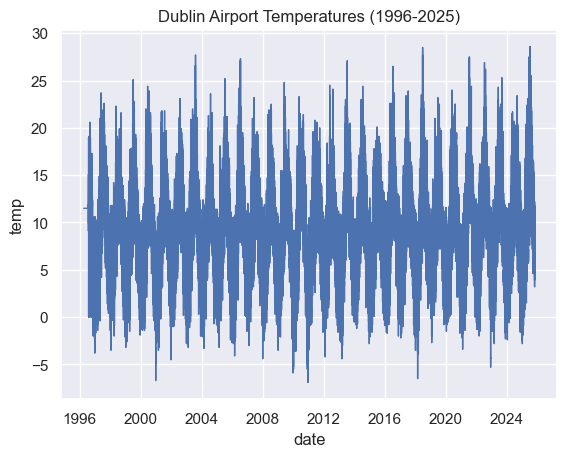

In [15]:
line = sns.lineplot(df['temp'], linewidth=1)
line.set_title('Dublin Airport Temperatures (1996-2025)')


## Plotting daily mean temperature

In [16]:
temp_daily_mean = pd.DataFrame(df['temp'].resample('D').mean())
temp_daily_mean.dropna(inplace=True)
temp_daily_mean.head()


temp
date                 
1996-04-10  11.500000
1996-07-31  12.650000
1996-08-01  11.666667
1996-08-02  12.504167
1996-08-03  14.266667

In [17]:
days_daily = temp_daily_mean.index.day
years_daily = temp_daily_mean.index.year
months_daily = temp_daily_mean.index.month

Text(0.5, 1.0, 'Dublin Airport Daily Average Temperatures (1996-2025)')

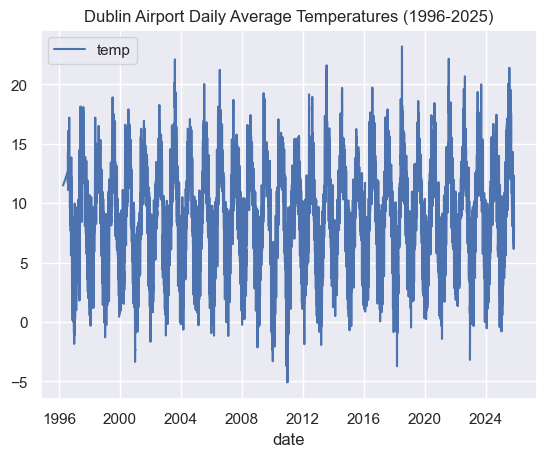

In [18]:
line = sns.lineplot(temp_daily_mean)
line.set_title('Dublin Airport Daily Average Temperatures (1996-2025)')

https://seaborn.pydata.org/examples/timeseries_facets.html

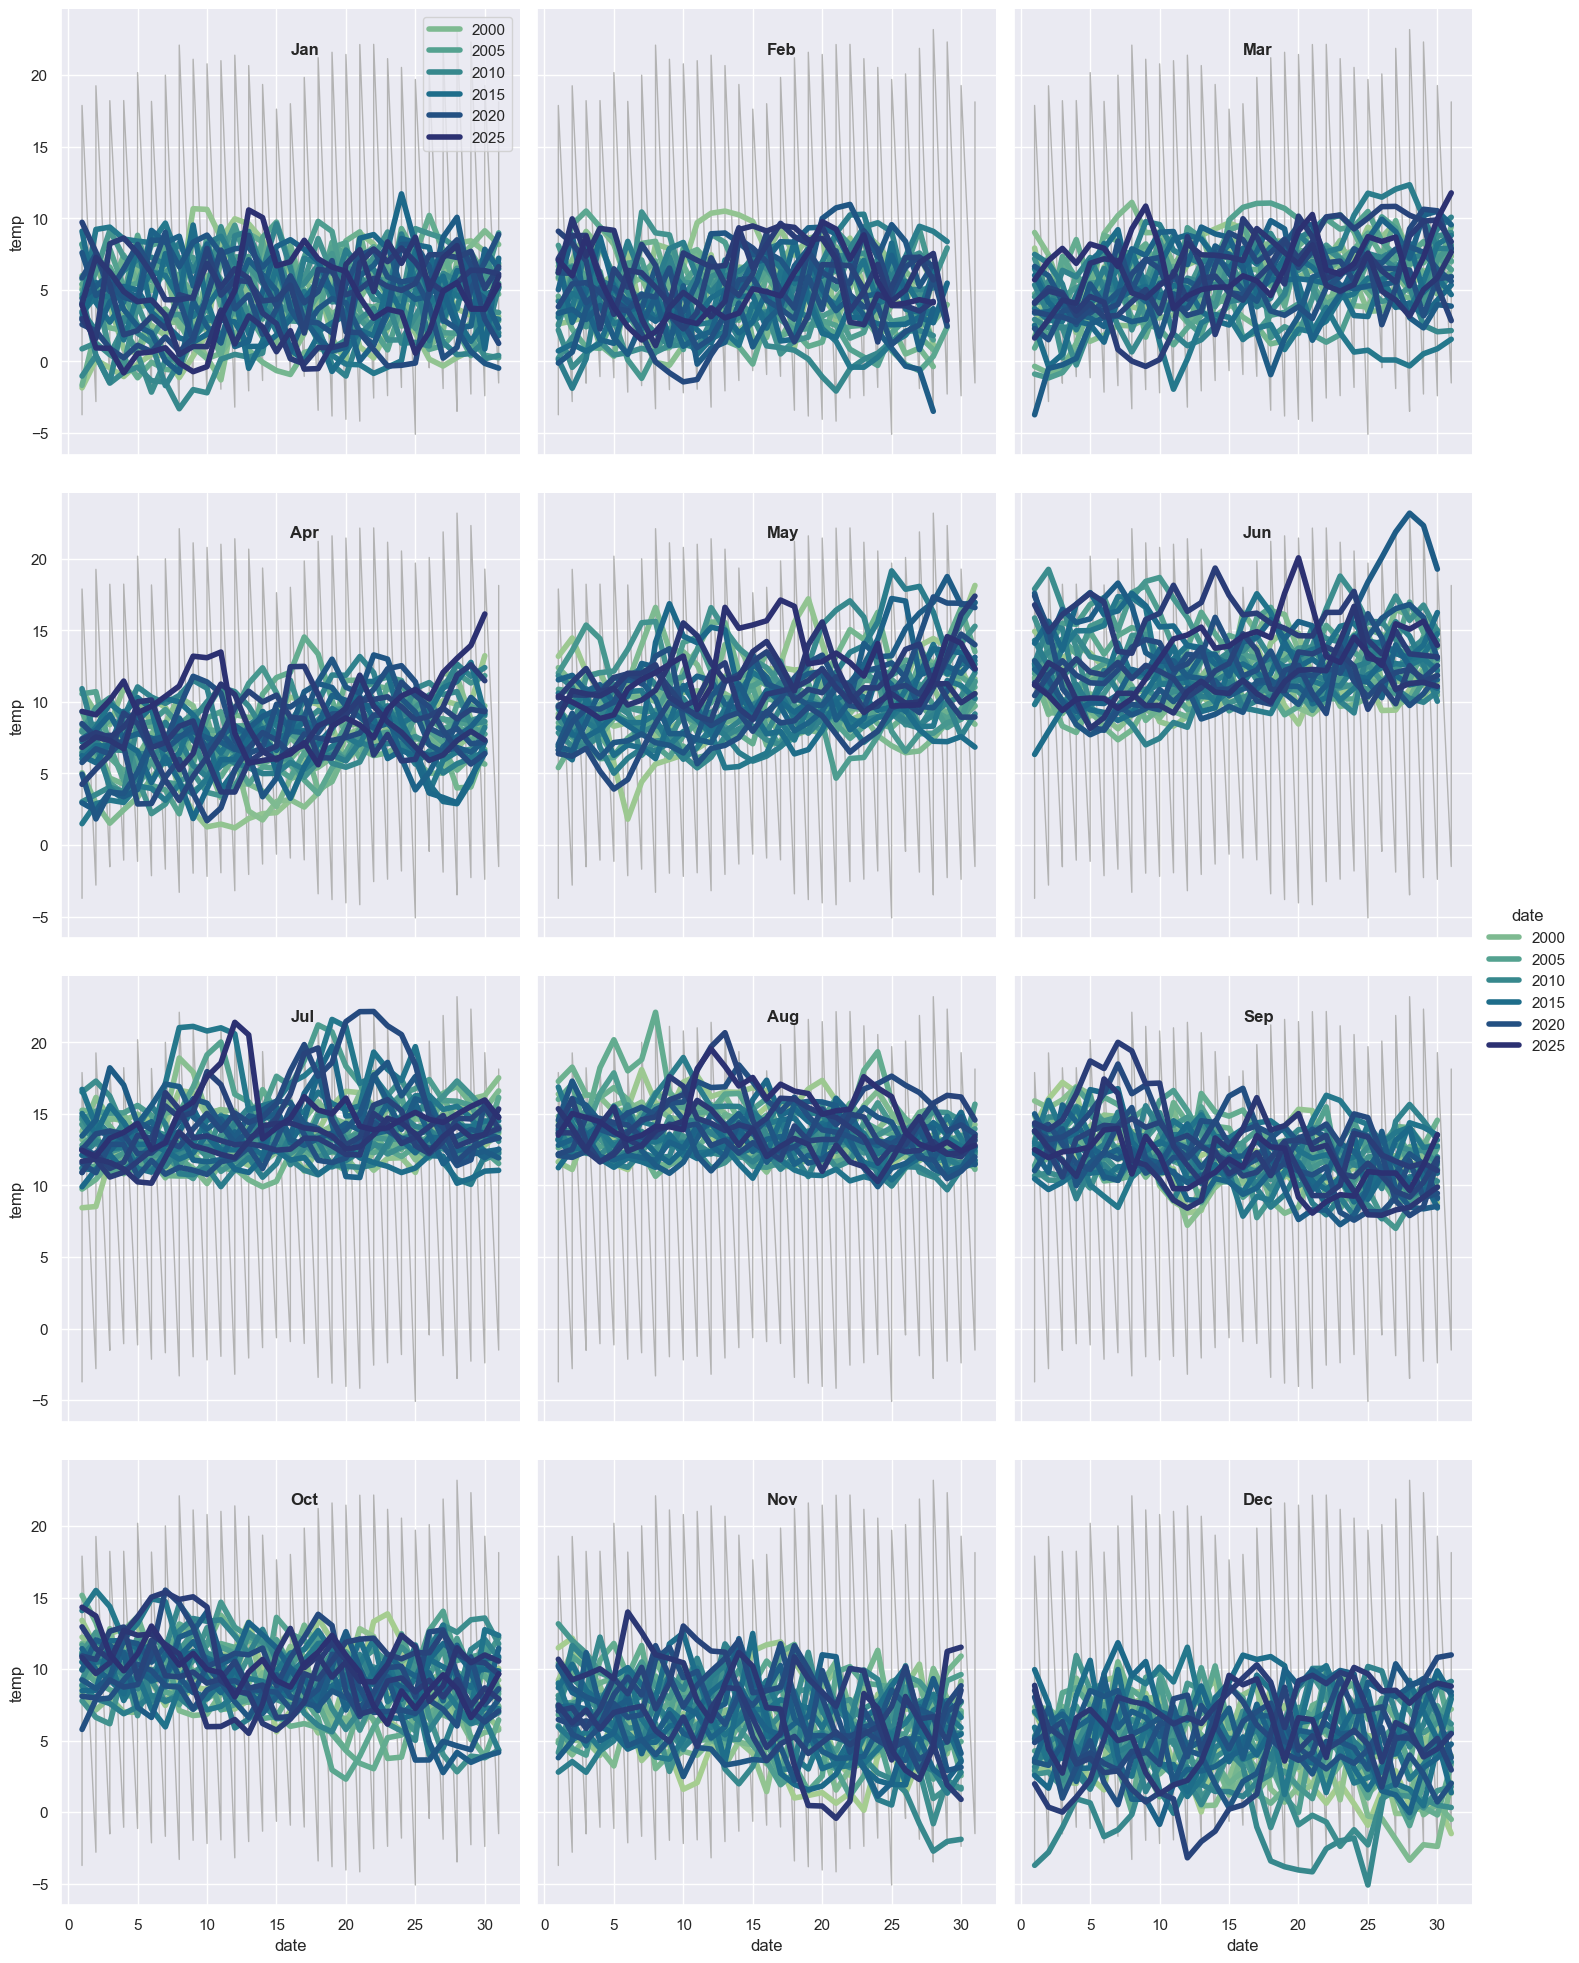

In [19]:
g = sns.relplot(
    temp_daily_mean, y='temp', x=days_daily, hue=years_daily, col=months_daily, 
    col_wrap=3, kind='line', palette='crest', linewidth=4, zorder=5
    )

for month, ax in g.axes_dict.items():
    # Add the title as an annotation within the plot
    ax.text(.5, .9, month_names.get(month), transform=ax.transAxes, fontweight="bold")
    ax.title.set_text('')
    

    # Plot every month's time series in the background
    sns.lineplot(
        data=temp_daily_mean, x=days_daily, y='temp', units=month,
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

## Plotting monthly mean temperature

In [20]:
temp_monthly_mean = pd.DataFrame(df['temp'].resample('MS').mean())
temp_monthly_mean.dropna(inplace=True)
temp_monthly_mean.head()

temp
date                 
1996-04-01  11.500000
1996-07-01  12.650000
1996-08-01  12.946909
1996-09-01  12.174306
1996-10-01   9.614113

In [21]:
months_monthly = temp_monthly_mean.index.month
years_monthly = temp_monthly_mean.index.year

<Axes: xlabel='date'>

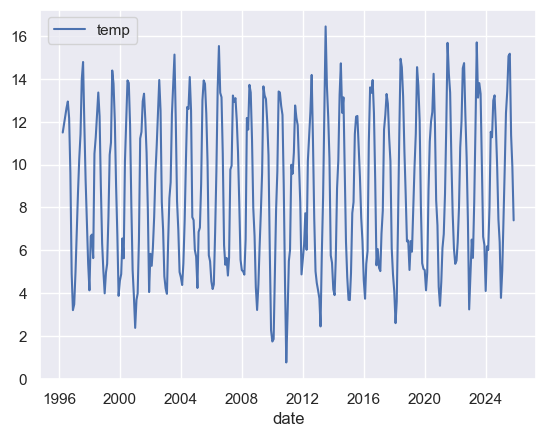

In [22]:
sns.lineplot(temp_monthly_mean)

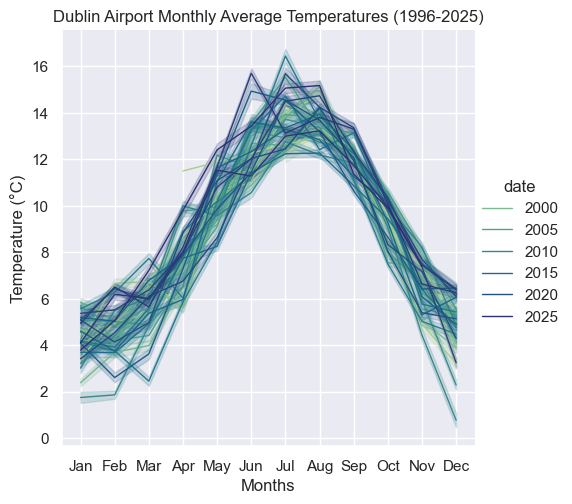

In [23]:
rel = sns.relplot(temps, x=months, y='temp', hue=years, kind='line', palette='crest', linewidth=1)
rel.set(title='Dublin Airport Monthly Average Temperatures (1996-2025)', xlabel='Months',
         ylabel='Temperature (°C)'
         )
rel.set(xticks=range(1,13))
rel.set_xticklabels(labels=month_names.values())


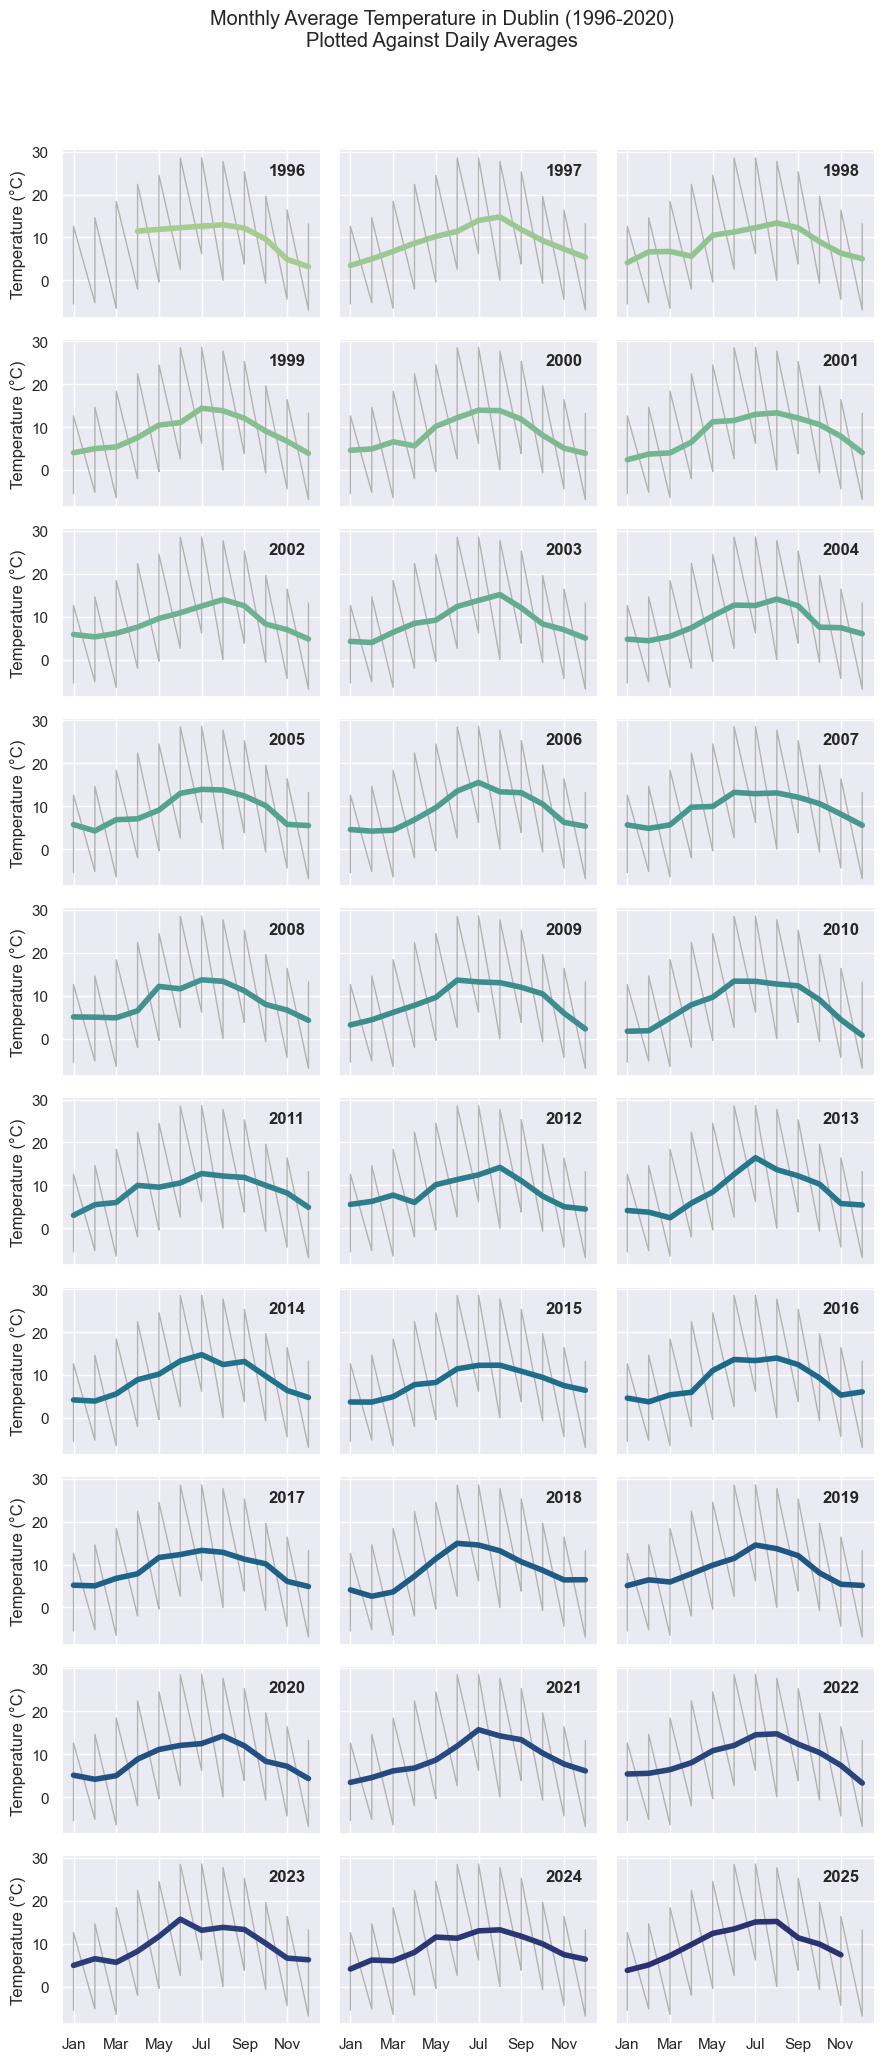

In [24]:
g = sns.relplot(temps, x=months, y='temp', hue=years, col=years, kind='line',
                palette='crest', linewidth=4, zorder=5, col_wrap=3, height=2,
                aspect=1.5, legend=False)

for year, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=temps, x=months, y='temp', units=year,
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

g.set(xticks=range(1,13,2))
g.set_xticklabels(list(month_names.values())[::2])
g.set_titles("")
g.figure.suptitle('Monthly Average Temperature in Dublin (1996-2020)' \
                    '\nPlotted Against Daily Averages', y=1.03)
g.set_axis_labels("", "Temperature (°C)")
g.tight_layout()

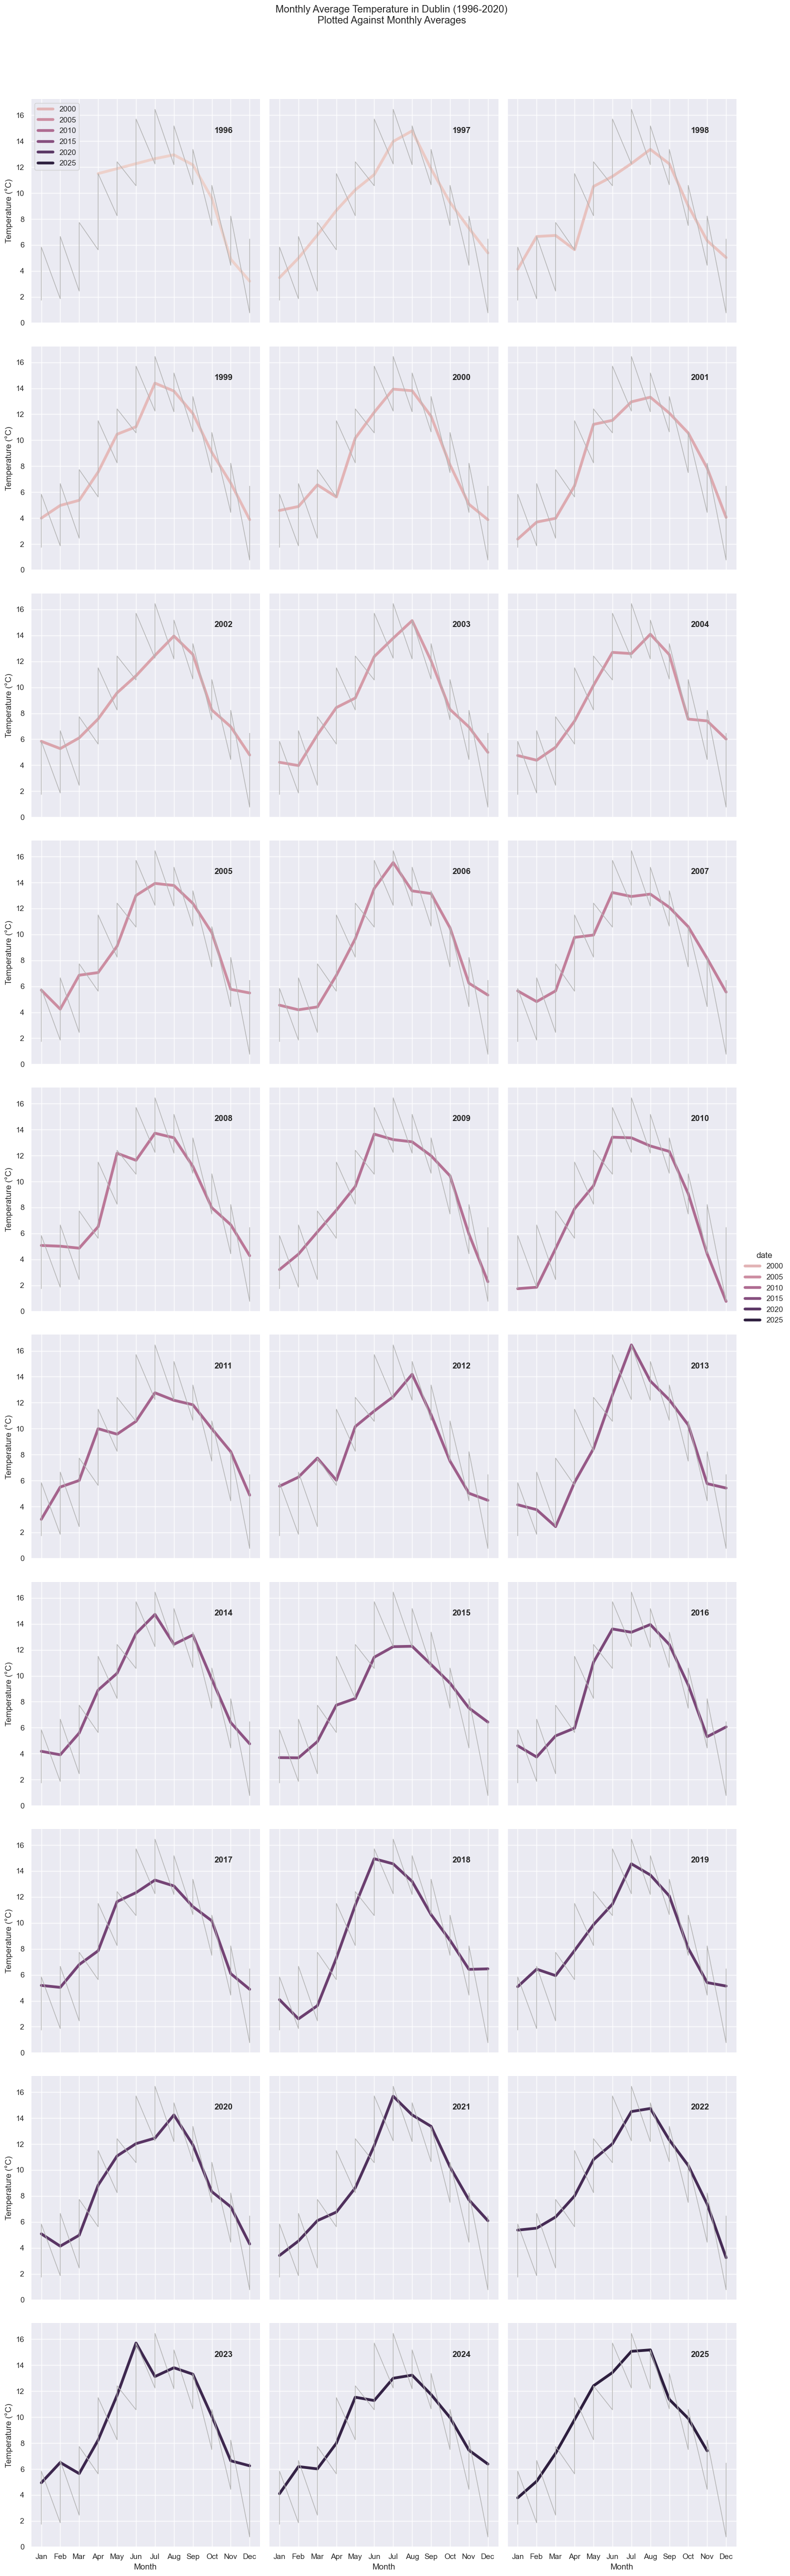

In [25]:
rel = sns.relplot(temp_monthly_mean, x=months_monthly, y='temp', hue=years_monthly,
                  col=years_monthly, col_wrap=3, kind='line', linewidth=4)

for year, ax in rel.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")
    ax.title.set_text('')

    # Plot every year's time series in the background
    sns.lineplot(
        data=temp_monthly_mean, x=months_monthly, y='temp', units=year,
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

rel.set(xticks=range(1,13))
rel.set_xticklabels(labels=month_names.values())
rel.figure.suptitle('Monthly Average Temperature in Dublin (1996-2020)' \
                    '\nPlotted Against Monthly Averages', y=1.03)
rel.set_axis_labels("Month", "Temperature (°C)")

## Plotting windspeed

In [26]:
windspeed = pd.DataFrame(df['wdsp'].dropna().loc[df['wdsp'] != ' '])
windspeed[:5]

wdsp
date                    
1996-04-10 14:00:00    0
1996-07-31 08:00:00    0
1996-07-31 09:00:00    0
1996-07-31 10:00:00    0
1996-07-31 11:00:00    0

In [27]:
windspeed = windspeed.astype(int)
windspeed = windspeed.iloc[windspeed.index > '1996-08-01']
windspeed[:5]

wdsp
date                     
1996-08-01 01:00:00     6
1996-08-01 02:00:00     8
1996-08-01 03:00:00     9
1996-08-01 04:00:00     8
1996-08-01 05:00:00     8

In [28]:
windspeed.loc[(windspeed.index > '1996-9-01 00:00:00') 
              & (windspeed.index < '1996-09-03 00:00:00')].head()

wdsp
date                     
1996-09-01 01:00:00     0
1996-09-01 02:00:00     0
1996-09-01 03:00:00     0
1996-09-01 04:00:00     0
1996-09-01 05:00:00     0

It looks like there are full days where windspeed is 0. This looks like a failure of the equipment rather than continuous days of calm weather. I could discount any measurements of 0 but this may remove valid measurements as well.

<Axes: xlabel='date'>

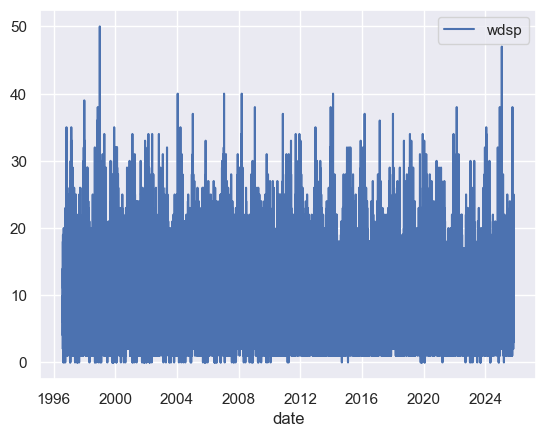

In [29]:
sns.lineplot(windspeed)

It looks like there are entire year spans of no measurements of 0 knots. It is possible that all of the 0 measurements are failures.

In [30]:
windspeed.loc[windspeed['wdsp'] == 0].head()

wdsp
date                     
1996-08-13 01:00:00     0
1996-09-01 01:00:00     0
1996-09-01 02:00:00     0
1996-09-01 03:00:00     0
1996-09-01 04:00:00     0

It looks like there were two full days in September 1996 where there was a windspeed of 0. It happens again in 1999 for several days in Nov, with some occasional small values. These look like failure. The rest of the 0 values are spread out sufficiently that it is possible they are real values. Is it worth removing these days from the analysis?

I will leave these in as without more information it is still possible these are valid observations.

In [31]:
windspeed

wdsp
date                     
1996-08-01 01:00:00     6
1996-08-01 02:00:00     8
1996-08-01 03:00:00     9
1996-08-01 04:00:00     8
1996-08-01 05:00:00     8
...                   ...
2025-10-31 20:00:00    13
2025-10-31 21:00:00    13
2025-10-31 22:00:00    10
2025-10-31 23:00:00     8
2025-11-01 00:00:00     7

[256366 rows x 1 columns]

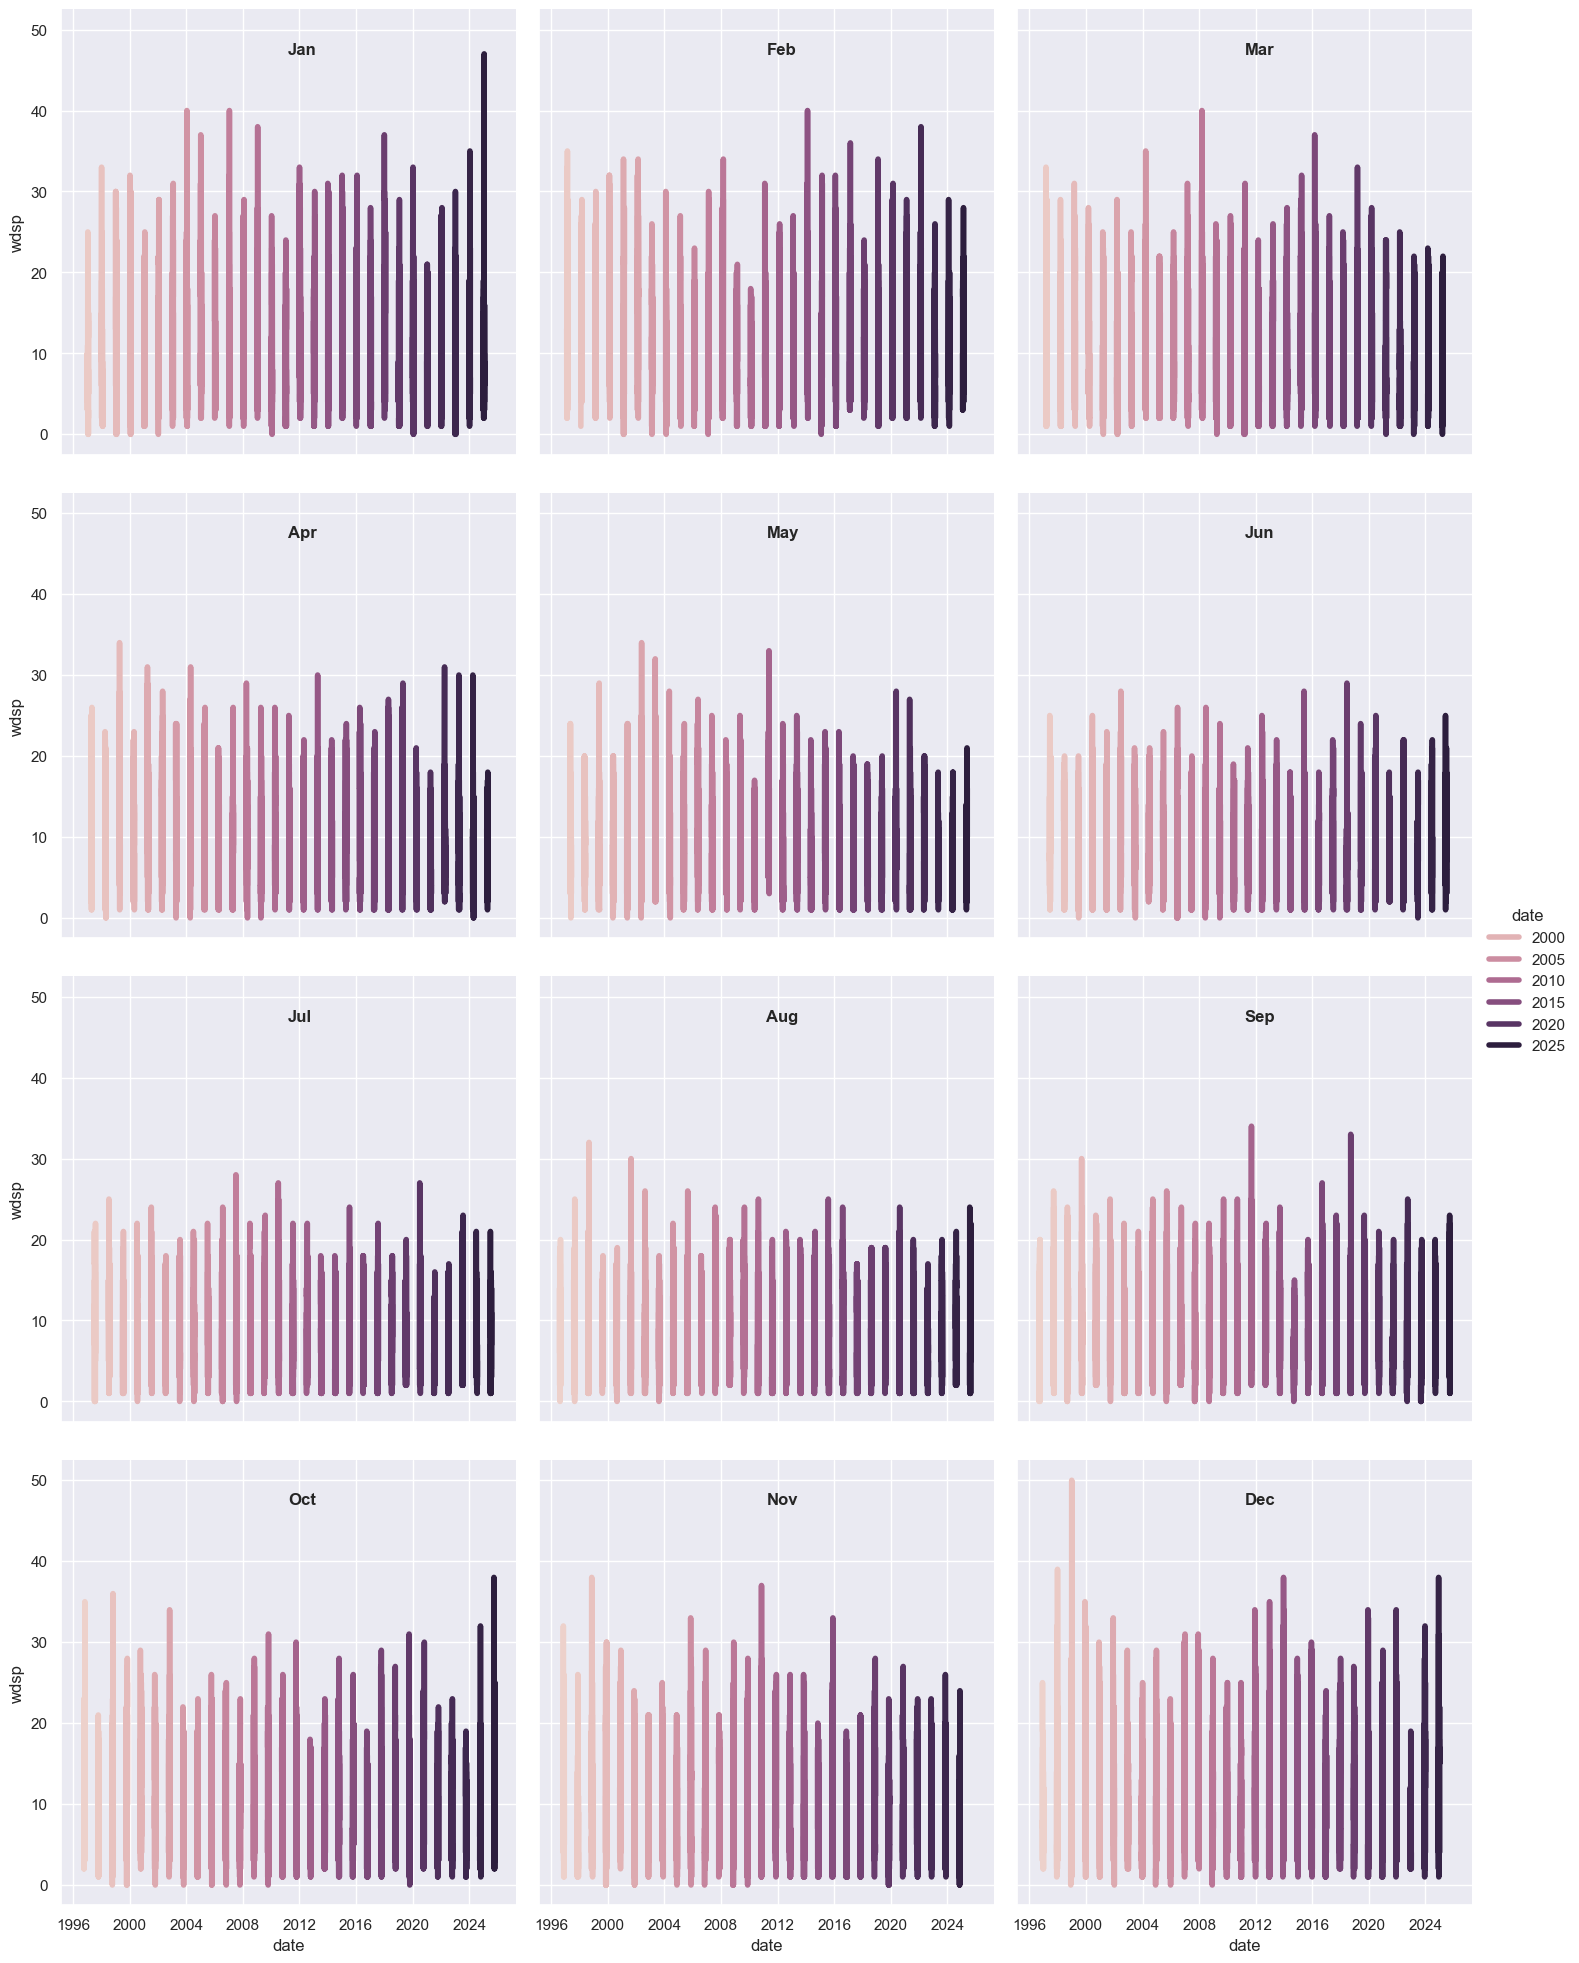

In [ ]:
rel = sns.relplot(windspeed, kind='line', x='date', y='wdsp', linewidth=4, hue=windspeed.index.year, col=windspeed.index.month, col_wrap=3)


for month, ax in rel.axes_dict.items():
    # Add the title as an annotation within the plot
    ax.text(.5, .9, month_names.get(month), transform=ax.transAxes, fontweight="bold")
    ax.title.set_text('')

## Average windspeed over 24 hours

In [33]:
wdsp_daily_mean = pd.DataFrame(windspeed.resample('D').mean())
wdsp_daily_mean.head()


wdsp
date                 
1996-08-01  10.409091
1996-08-02   7.625000
1996-08-03   6.666667
1996-08-04  11.041667
1996-08-05   8.000000

<Axes: xlabel='date'>

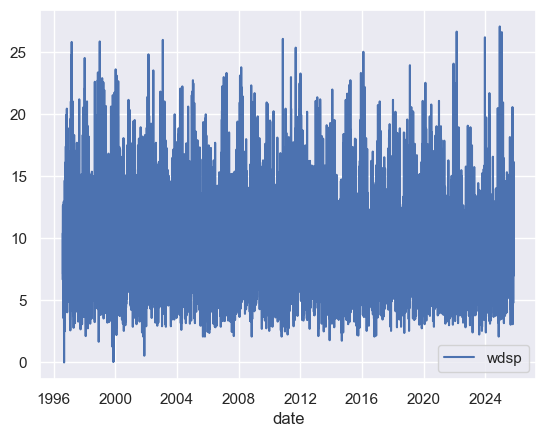

In [34]:
sns.lineplot(wdsp_daily_mean)

## Daily max windspeed

In [35]:
wdsp_daily_max = pd.DataFrame(windspeed.resample('D').max())
wdsp_daily_max.head()

wdsp
date            
1996-08-01    14
1996-08-02    13
1996-08-03    10
1996-08-04    18
1996-08-05    14

<Axes: xlabel='date'>

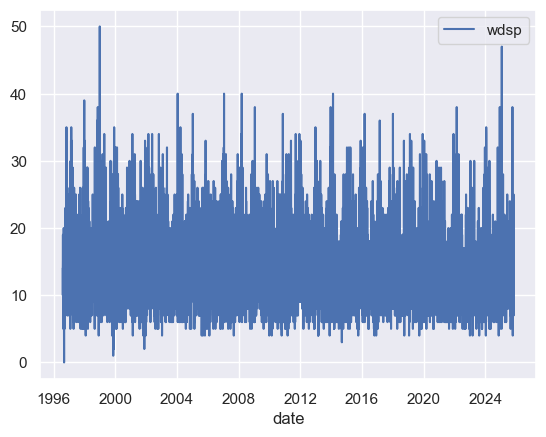

In [36]:
sns.lineplot(wdsp_daily_max)

# Monthly mean of daily max windspeed

In [37]:
mean_max_wdsp = pd.DataFrame(wdsp_daily_max.resample('MS').mean())
mean_max_wdsp.head()

wdsp
date                 
1996-08-01  12.516129
1996-09-01  12.266667
1996-10-01  18.193548
1996-11-01  17.133333
1996-12-01  13.258065

<Axes: xlabel='date'>

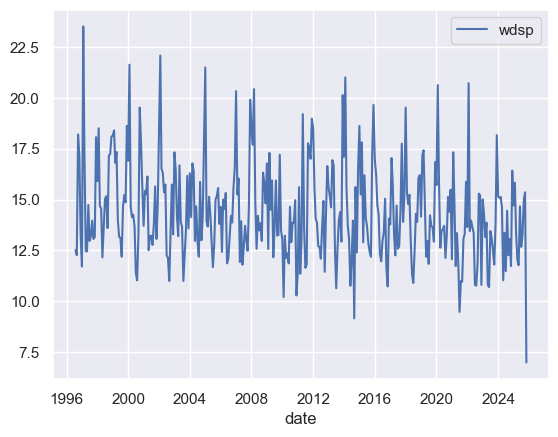

In [38]:
sns.lineplot(mean_max_wdsp)